# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
print("Beginning Data Retrieval  ")
print("--------------------------")
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_winds = []
city_country = []


set_count = 0

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        
        print("End of set. Sleeping for 60 seconds.")
        print("--------------------------")
        print("Data Retrieval Complete   ")
        print("--------------------------")
        time.sleep(60)
   
    
    try: 
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key  
        set_count += 1    
        city_url = url + "&q=" 

        weather_response = requests.get(city_url + city).json()
        city_name.append(weather_response["name"])
        city_lat.append(weather_response["coord"]["lat"])
        city_lng.append(weather_response["coord"]["lon"])
        city_max_temp.append(weather_response["main"]["temp_max"])
        city_humidity.append(weather_response["main"]["humidity"])
        city_clouds.append(weather_response["clouds"]["all"])
        city_winds.append(weather_response["wind"]["speed"])
        city_country.append(weather_response["sys"]["country"])
        print(f"City Name: {city}, City number: {set_count}")
        
    except:
        print("City not found. Skipping...")
        pass
    
    

Beginning Data Retrieval  
--------------------------
City not found. Skipping...
City Name: labuhan, City number: 2
City Name: bluff, City number: 3
City Name: ushuaia, City number: 4
City Name: hermanus, City number: 5
City Name: tymovskoye, City number: 6
City not found. Skipping...
City Name: mount isa, City number: 8
City Name: baghdad, City number: 9
City Name: saskylakh, City number: 10
City Name: carnarvon, City number: 11
City Name: rikitea, City number: 12
City Name: tubuala, City number: 13
City Name: hobart, City number: 14
City Name: westport, City number: 15
City Name: new norfolk, City number: 16
City Name: sarankhola, City number: 17
City Name: ponta do sol, City number: 18
City Name: castro, City number: 19
City Name: butaritari, City number: 20
City not found. Skipping...
City Name: port hardy, City number: 22
City Name: maceio, City number: 23
City Name: bredasdorp, City number: 24
City Name: sao joao da barra, City number: 25
City Name: georgetown, City number: 26
C

City Name: guerrero negro, City number: 209
City Name: trinidad, City number: 210
City Name: puerto escondido, City number: 211
City Name: bayji, City number: 212
City not found. Skipping...
City Name: tayga, City number: 214
City Name: waingapu, City number: 215
City Name: longyearbyen, City number: 216
City Name: clyde river, City number: 217
City Name: avarua, City number: 218
City Name: saint-augustin, City number: 219
City Name: zhangzhou, City number: 220
City Name: saint anthony, City number: 221
City Name: izyum, City number: 222
City Name: aksehir, City number: 223
City Name: agadir, City number: 224
City Name: natal, City number: 225
City Name: jimenez, City number: 226
City Name: havre-saint-pierre, City number: 227
City Name: binga, City number: 228
City Name: port macquarie, City number: 229
City Name: constitucion, City number: 230
City Name: kushmurun, City number: 231
City Name: oranjemund, City number: 232
City Name: san cristobal, City number: 233
City Name: sawtell, 

City Name: soure, City number: 414
City Name: hambantota, City number: 415
City Name: lagoa da canoa, City number: 416
City Name: oum hadjer, City number: 417
City Name: sao borja, City number: 418
City Name: ust-uda, City number: 419
City Name: ustka, City number: 420
City Name: iqaluit, City number: 421
City Name: moose factory, City number: 422
City Name: majene, City number: 423
City Name: shamary, City number: 424
City Name: verin, City number: 425
City Name: egvekinot, City number: 426
City not found. Skipping...
City Name: bima, City number: 428
City Name: narsaq, City number: 429
City Name: mangan, City number: 430
City Name: tommot, City number: 431
City Name: ossora, City number: 432
City Name: burgersdorp, City number: 433
City Name: miles city, City number: 434
City Name: mount gambier, City number: 435
City Name: machachi, City number: 436
City Name: sabinopolis, City number: 437
City Name: severnoye, City number: 438
City Name: mayo, City number: 439
City Name: moyo, City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({"Country": city_country,"City": city_name, "Latitude": city_lat, "Longitude": city_lng, 
                 "Temperature": city_max_temp, "Humidity": city_humidity, "Clouds": city_clouds, "Winds": city_winds})

city_data.index+=1
city_data.index

city_data

,Country,City,Latitude,Longitude,Temperature,Humidity,Clouds,Winds
1,ID,Labuhan,-6.8844,112.2051,76.57,89,94,8.72
2,NZ,Bluff,-46.6000,168.3333,54.81,83,100,10.49
3,AR,Ushuaia,-54.8000,-68.3000,53.26,43,20,17.27
4,ZA,Hermanus,-34.4187,19.2345,70.81,79,13,15.97
5,RU,Tymovskoye,50.8456,142.6550,-12.64,100,62,3.06
...,...,...,...,...,...,...,...,...
542,JP,Abashiri,44.0213,144.2697,15.94,93,87,3.36
543,DE,Bad Sachsa,51.5950,10.5555,46.15,88,96,5.59
544,VN,Quang Ngai,15.1167,108.8000,70.27,92,100,5.59
545,KZ,Zhezkazgan,47.8043,67.7144,12.52,86,44,16.55


In [5]:
city_data.to_csv("Output/City.csv", 
                 encoding ="utf-8", index= False, header = True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

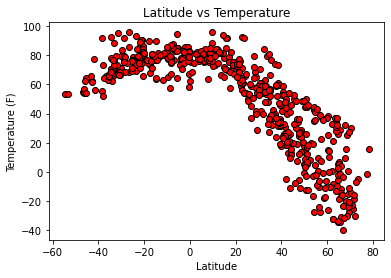

In [18]:
plt.scatter(city_data["Latitude"], city_data["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")



## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

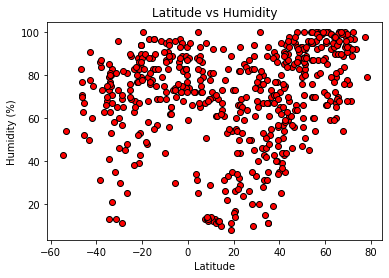

In [19]:
plt.scatter(city_data["Latitude"], city_data["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

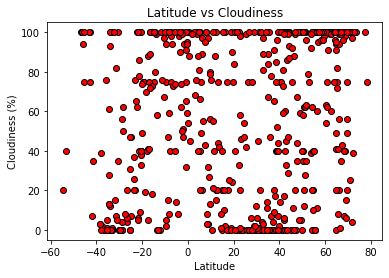

In [20]:
plt.scatter(city_data["Latitude"], city_data["Clouds"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")


## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

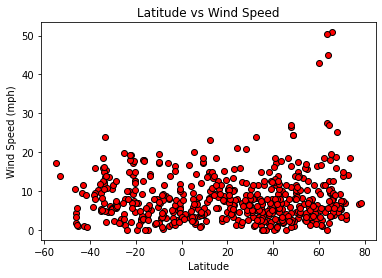

In [22]:
plt.scatter(city_data["Latitude"], city_data["Winds"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")


## Linear Regression

In [23]:
new_lat = city_data["Latitude"] > 0
north_hemisph = city_data[new_lat]
south_hemisph = city_data[~new_lat]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

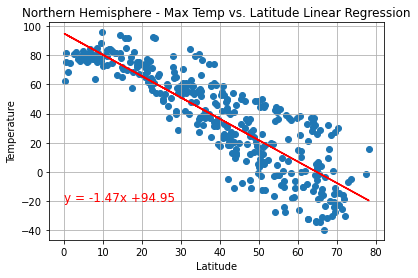

In [48]:
x_values =  north_hemisph["Latitude"]
y_values = north_hemisph["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,-20),fontsize=12,color="red")
plt.grid()

plt.show()

# steep decline in temperature as the latitude increases

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

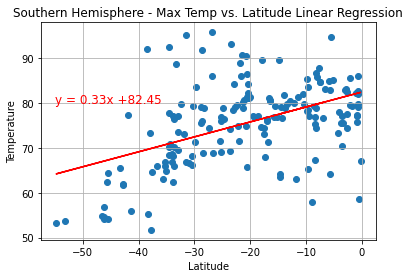

In [52]:
x_values =  south_hemisph["Latitude"]
y_values = south_hemisph["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-55,80),fontsize=12,color="red")
plt.grid()

plt.show()

# solid increase in temperature as the latitude increases 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

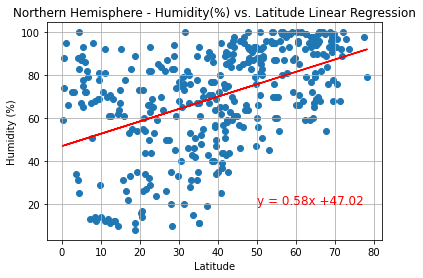

In [54]:
x_values =  north_hemisph["Latitude"]
y_values = north_hemisph["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.grid()

plt.show()

# solid increase in humidity as the latitude increases

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

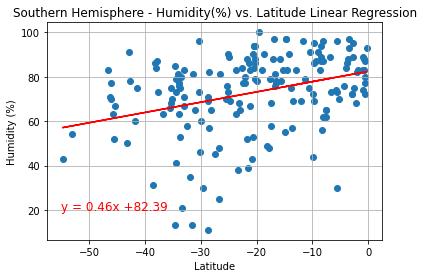

In [55]:
x_values =  south_hemisph["Latitude"]
y_values = south_hemisph["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.grid()

plt.show()

# as the latitude increases so does the humidty

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

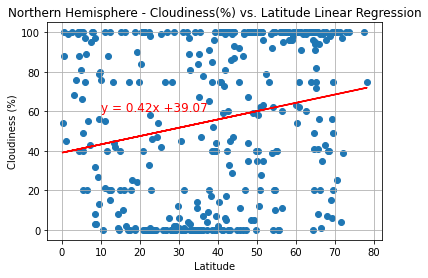

In [57]:
x_values = north_hemisph["Latitude"]
y_values = north_hemisph["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(10,60),fontsize=12,color="red")
plt.grid()

plt.show()
# as the latitude increases so does the cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

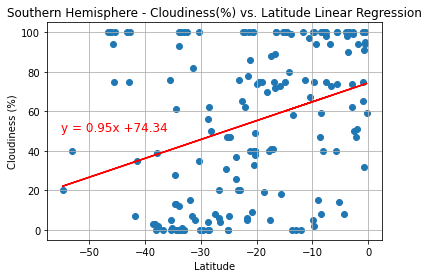

In [59]:
x_values = south_hemisph["Latitude"]
y_values = south_hemisph["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-55,50),fontsize=12,color="red")
plt.grid()

plt.show()
# as the latitude increases so does the cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

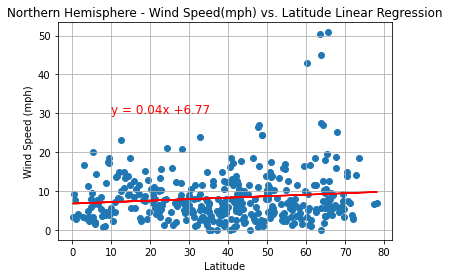

In [61]:
x_values = north_hemisph["Latitude"]
y_values = north_hemisph["Winds"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(10,30),fontsize=12,color="red")
plt.grid()

plt.show()
# slight increase in wind speeds as the latitude increases

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

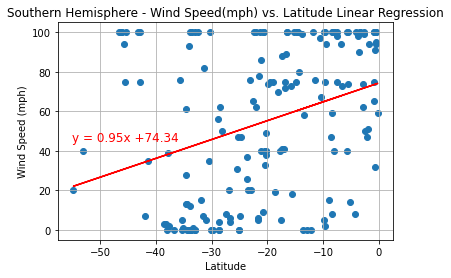

In [64]:
x_values = south_hemisph["Latitude"]
y_values = south_hemisph["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-55,45),fontsize=12,color="red")
plt.grid()

plt.show()
# steep increase in wind speeds as the latitude increase